# Realizando leitura do txt e criando grafo

Primeiramente, temos que fazer a leitura do txt, identificando as dimensoões do tabuleiro na primeira linha, posteriormente cada asterístico deve ser lido como um espaço em branco no tabuleiro (posicoes que pode andar), traço representa obstáculos, jogo da velha a posição inicial e cifrão a posição objetivo. Além disso, precisamos criar um grafo guardando as informações em cada vértice, para não concumir tanta memória (matriz muito esparsa) iremos utilizar a representação de **lista de adjacência**

In [101]:
#Abrindo arquivo para leitura -> passar o caminho correto para o txt (aqui deixei na mesma pasta)
f = open("labirinto1.txt",'r')
print(f)

<_io.TextIOWrapper name='labirinto1.txt' mode='r' encoding='UTF-8'>


In [102]:
#Lendo primeira linha para obter dimensoes
line = f.readline()
dimensions = line.split()
rows = int(dimensions[0])
cols = int(dimensions[1])
print("Numero de linhas: ", rows, "\nNumero de colunas: ", cols)

Numero de linhas:  29 
Numero de colunas:  26


In [103]:
#Lendo o resto de linhas
maze = f.readlines()
#Printando o labirinto
for l in maze:
    print(l)

**#*********--************

*----*-----*--*-----*----*

*----*-----*--*-----*----*

*----*-----*--*-----*----*

**************************

-----*--*--------*--*----*

-----*--*--------*--*----*

******--****--****--******

-----*-----*--*-----*-----

-----*-----*--*-----*-----

-----*--**********--*-----

-----*--*--------*--*-----

-----*--*--------*--*-----

*********--------*********

-----*--*--------*--*-----

-----*--*--------*--*-----

-----*--**********--*-----

-----*--*--------*--*-----

-----*--*--------*--*-----

************--************

*----*-----*--*-----*----*

*----*-----*--*-----*----*

***--****************--***

--*--*--*--------*--*--*--

--*--*--*--------*--*--*--

******--****--****--******

*----------*--*----------*

*----------*--*----------*

**********************$***



(-0.5, 25.5, 28.5, -0.5)

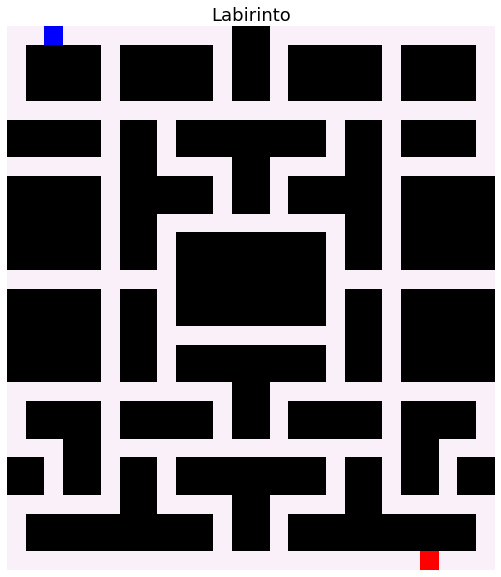

In [104]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_maze = np.zeros((rows, cols,3), np.uint8)

for i in range(0, rows):
    for j in range(0, cols):
        if(maze[i][j] == '-'):
            img_maze[i][j] = [0,0,0]
        elif(maze[i][j] == '*'):
            img_maze[i][j] = [250,240,250]
        elif(maze[i][j] == '#'):
            img_maze[i][j] = [0,0,255]
        elif(maze[i][j] == '$'):
            img_maze[i][j] = [255,0,0]
f, ax = plt.subplots(figsize=(20, 10))
ax.imshow(img_maze)
ax.set_title('Labirinto', fontsize=18)
ax.axis('off')


In [105]:
#Guardará o grafo
graph = {}
#Guardará a posicao inicial (#)
ini_position = 0
#Guardará a saída do grafo ($)
fin_position = 0
#Vamos percorrer a matriz de caracteres
for i in range(0, rows):
    for j in range(0, cols):
        #Se é - nem considero como vertice (nao pode passar)
        if(maze[i][j] != '-'):
            
            #Lista que guarda os vertices adjacentes(que possui conexao) ao em analise atual
            adj_list = []
            
            #Condicao para guardar a posicao inicial
            if(maze[i][j] =='#'):
                ini_position = (i,j)
                
            #Condicao para guardar a posicao de saida do labirinto
            elif(maze[i][j] == '$'):
                fin_position = (i,j)
            
            #Checando as posicoes adjacentes ao vertice atual
            for aux in [(i,j+1),(i+1,j),(i,j-1),(i-1,j)]:
                #Checo se e uma posicao valida (se existe a posicao)
                if((aux[0] >= 0) and (aux[0] < rows) and (aux[1] >= 0) and (aux[1] < cols)):
                    #Se essa posicao adjacente tiver conexao 
                    if(maze[aux[0]][aux[1]] != '-'):
                        adj_list.append((aux[0],aux[1]))
            graph[(i,j)] = adj_list

In [106]:
#Printando a posicao inicial e a saida do labirinto
print("Posicao de inicio: ", ini_position)
print("Posicao de saida: ", fin_position)

Posicao de inicio:  (0, 2)
Posicao de saida:  (28, 22)


In [107]:
#Printando o grafo
for vertix in graph:
    print(vertix, ": ", graph[vertix])

(0, 0) :  [(0, 1), (1, 0)]
(0, 1) :  [(0, 2), (0, 0)]
(0, 2) :  [(0, 3), (0, 1)]
(0, 3) :  [(0, 4), (0, 2)]
(0, 4) :  [(0, 5), (0, 3)]
(0, 5) :  [(0, 6), (1, 5), (0, 4)]
(0, 6) :  [(0, 7), (0, 5)]
(0, 7) :  [(0, 8), (0, 6)]
(0, 8) :  [(0, 9), (0, 7)]
(0, 9) :  [(0, 10), (0, 8)]
(0, 10) :  [(0, 11), (0, 9)]
(0, 11) :  [(1, 11), (0, 10)]
(0, 14) :  [(0, 15), (1, 14)]
(0, 15) :  [(0, 16), (0, 14)]
(0, 16) :  [(0, 17), (0, 15)]
(0, 17) :  [(0, 18), (0, 16)]
(0, 18) :  [(0, 19), (0, 17)]
(0, 19) :  [(0, 20), (0, 18)]
(0, 20) :  [(0, 21), (1, 20), (0, 19)]
(0, 21) :  [(0, 22), (0, 20)]
(0, 22) :  [(0, 23), (0, 21)]
(0, 23) :  [(0, 24), (0, 22)]
(0, 24) :  [(0, 25), (0, 23)]
(0, 25) :  [(1, 25), (0, 24)]
(1, 0) :  [(2, 0), (0, 0)]
(1, 5) :  [(2, 5), (0, 5)]
(1, 11) :  [(2, 11), (0, 11)]
(1, 14) :  [(2, 14), (0, 14)]
(1, 20) :  [(2, 20), (0, 20)]
(1, 25) :  [(2, 25), (0, 25)]
(2, 0) :  [(3, 0), (1, 0)]
(2, 5) :  [(3, 5), (1, 5)]
(2, 11) :  [(3, 11), (1, 11)]
(2, 14) :  [(3, 14), (1, 14)]
(2, 2

# Busca em profundidade

Iremos implementar agora um algoritmo que realiza uma busca em profundidade no grafo, guardando os vétices visitados com sua respectiva profundidade para depois ser utilizado nos algoritmos de busca informada, uma lista com os vértices indicicando o caminho da posição inicial a saída do labirinto na ordem de busca do DFS e depois a imagem com o caminho indicado

In [108]:
def DFS(graph, vertix, visited, cont, target, path):
    #Guarda o vértice visitado com a sua profundidade
    visited[vertix] = cont
    
    #Insere vertice na lista que guarda o caminho
    path.append(vertix)
    
    #Se o vertice final for encontrado para e retorna verdadeiro
    if(vertix == target):
        return True
    
    #Para cada vizinho do vertice atual 
    for neighboor in graph[vertix]:
        #Checa se ele já não foi visitado
        if neighboor not in visited:
            #Se nao, visita ele e retorna verdadeiro se o seu vizinho pode ser visitado
            if DFS(graph, neighboor, visited, cont+1, target, path):
                return True
    path.pop()
    return False
    

def Depth_First_Search(graph, v_ini, v_fin):
    #Dicionário com os vértices visitados e a profundidade de cada
    visited = {}
    #Deque que guardará o caminho exato entre o vertice inicial e final
    path = []
    #Contador inicializado com 1
    cont = 1
    #Chama a funcao que realmente vai realizar a busca em profundidade
    test = DFS(graph, v_ini, visited, cont, v_fin, path)
    if not test:
        print("Nao existe um caminho valido entre a posicao inicial e a saida")
    return visited, path
    

In [109]:
DFS_visited, DFS_path = Depth_First_Search(graph, ini_position, fin_position)

In [110]:
print("Vertices visitados com profundidade: \n" ,DFS_visited)
print("\nTotal de vertices visitados: ",len(DFS_visited),"\n")
print("Caminho entre posicao inicial e saida:\n",DFS_path)

Vertices visitados com profundidade: 
 {(0, 2): 1, (0, 3): 2, (0, 4): 3, (0, 5): 4, (0, 6): 5, (0, 7): 6, (0, 8): 7, (0, 9): 8, (0, 10): 9, (0, 11): 10, (1, 11): 11, (2, 11): 12, (3, 11): 13, (4, 11): 14, (4, 12): 15, (4, 13): 16, (4, 14): 17, (4, 15): 18, (4, 16): 19, (4, 17): 20, (4, 18): 21, (4, 19): 22, (4, 20): 23, (4, 21): 24, (4, 22): 25, (4, 23): 26, (4, 24): 27, (4, 25): 28, (5, 25): 29, (6, 25): 30, (7, 25): 31, (7, 24): 32, (7, 23): 33, (7, 22): 34, (7, 21): 35, (7, 20): 36, (8, 20): 37, (9, 20): 38, (10, 20): 39, (11, 20): 40, (12, 20): 41, (13, 20): 42, (13, 21): 43, (13, 22): 44, (13, 23): 45, (13, 24): 46, (13, 25): 47, (14, 20): 43, (15, 20): 44, (16, 20): 45, (17, 20): 46, (18, 20): 47, (19, 20): 48, (19, 21): 49, (19, 22): 50, (19, 23): 51, (19, 24): 52, (19, 25): 53, (20, 25): 54, (21, 25): 55, (22, 25): 56, (22, 24): 57, (22, 23): 58, (23, 23): 59, (24, 23): 60, (25, 23): 61, (25, 24): 62, (25, 25): 63, (26, 25): 64, (27, 25): 65, (28, 25): 66, (28, 24): 67, (28, 23

Text(0.5, 1.0, 'Labirinto - Busca Profundidade')

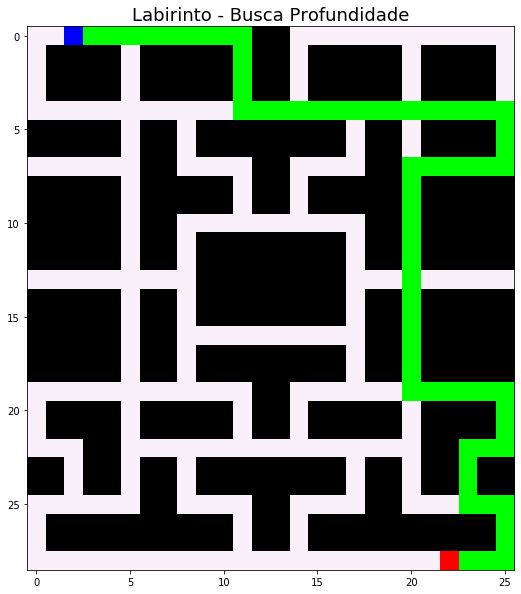

In [111]:
for v in DFS_path:
    img_maze[v[0]][v[1]] = [0,255,0]

img_maze[ini_position[0]][ini_position[1]] = [0,0,255]
img_maze[fin_position[0]][fin_position[1]] = [255,0,0]
    
f1, ax1 = plt.subplots(figsize=(20, 10))
ax1.imshow(img_maze)
ax1.set_title('Labirinto - Busca Profundidade', fontsize=18)
#ax1.axis('off')

# Busca Best-First Search

Iremos implementar agora o algoritmo Best-First Search, que é um algoritmo de busca informada, ele utiliza os pesos das arestas para determinar um caminho, dessa forma o grau de profundidade obtido no DFS será utilizado como pesos para cada vértice